<a href="https://colab.research.google.com/github/PahlavaniWorkshop/AIWorkshop/blob/main/MIHousingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
# Generate a synthetic dataset (features: size in sq.ft, number of bedrooms; target: price)
data = {
    "Size_sqft": np.random.randint(500, 4000, 100),
    "Bedrooms": np.random.randint(1, 6, 100),
    "Price": lambda df: df["Size_sqft"] * 300 + df["Bedrooms"] * 5000 + np.random.randint(-10000, 10000, 100)
}
data["Price"] = data["Price"](data)
data = pd.DataFrame(data)

In [15]:
# Split the dataset into features (X) and target (y)
X = data[["Size_sqft", "Bedrooms"]]
y = data["Price"]

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [7]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 38162742.77464111


In [8]:
# Example usage of the trained model to predict the price of a new house
new_house = np.array([[2000, 3]])  # Size: 2000 sq.ft, Bedrooms: 3
predicted_price = model.predict(new_house)
print(f"Predicted Price for the new house: ${predicted_price[0]:,.2f}")

Predicted Price for the new house: $614,434.25


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


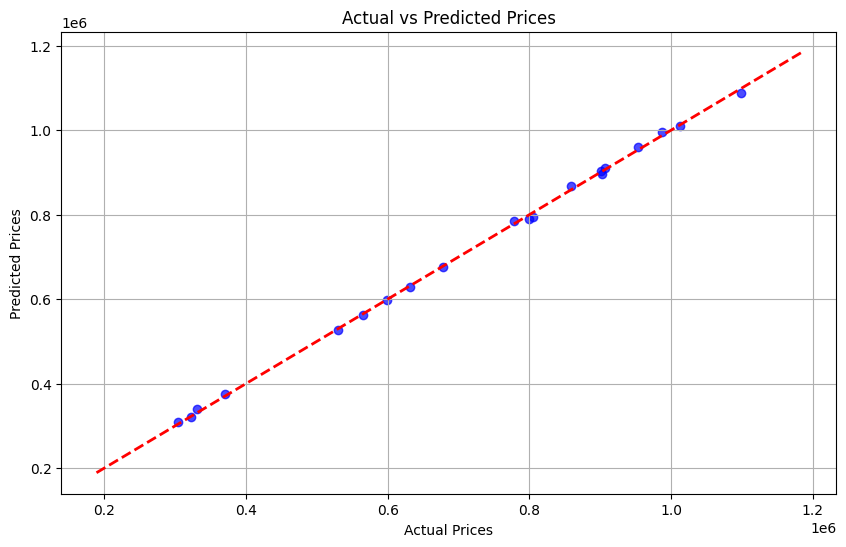

In [9]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [25]:
import joblib

# Save the trained model
joblib.dump(model, 'house_price_model.pkl')
print("Model saved as 'house_price_model.pkl'")


Model saved as 'house_price_model.pkl'


In [16]:
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
california_data = fetch_california_housing(as_frame=True)
data = california_data.frame

# Inspect the data
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [18]:
# Load California housing dataset
california_data = fetch_california_housing(as_frame=True)
data = california_data.frame

In [19]:
# Features (X) and target (y)
X = data[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]]
y = data["MedHouseVal"]

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:

# Make predictions on the test set
y_pred = model.predict(X_test)

In [23]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.5558915986952444


In [24]:

# Example usage of the trained model to predict the price of a new house
new_house = np.array([[8.0, 30.0, 6.0, 1.0, 500.0, 3.0, 37.85, -122.25]])  # Example input
predicted_price = model.predict(new_house)
print(f"Predicted Price for the new house: ${predicted_price[0]:,.2f}")


Predicted Price for the new house: $4.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
import joblib

# Save the trained model
joblib.dump(model, 'house_price_modelN.pkl')
print("Model saved as 'house_price_modelN.pkl'")

Model saved as 'house_price_modelN.pkl'


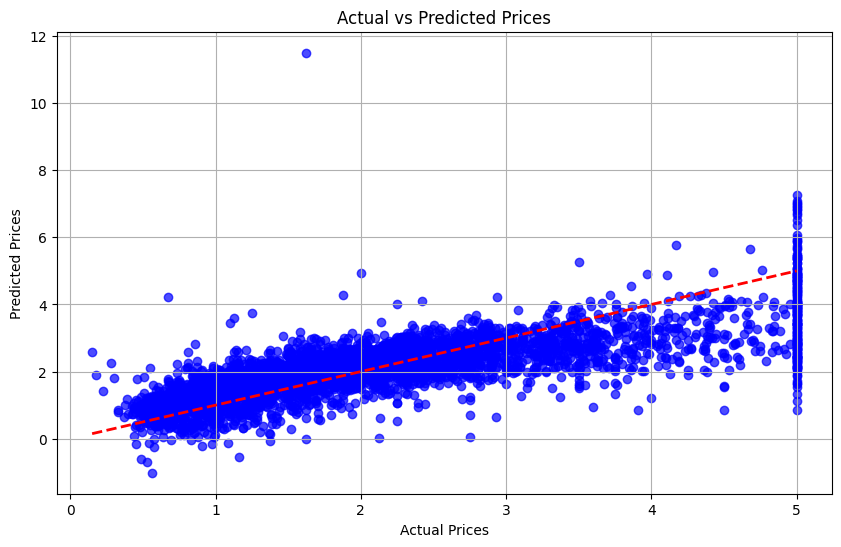

In [27]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [30]:

# Load California housing dataset
california_data = fetch_california_housing(as_frame=True)
data = california_data.frame

# Inspect the data
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [31]:
X = data.drop("MedHouseVal", axis=1)
y = data["MedHouseVal"]


In [32]:
# 2. Preprocessing
# Check for missing values
if X.isnull().sum().sum() > 0:
    X.fillna(X.median(), inplace=True)

In [33]:

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [35]:
# 3. Train multiple regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = []

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "R²": r2
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

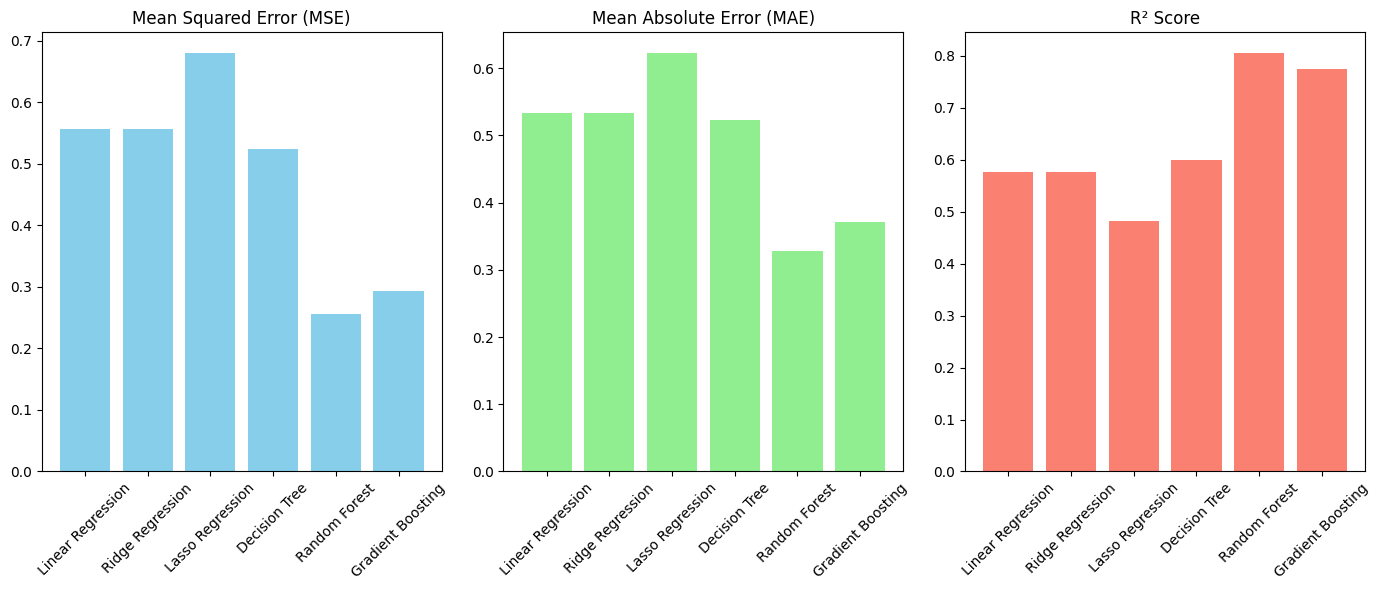

In [36]:
# 4. Visualization
# Plot MSE, MAE, and R² for each model
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.bar(results_df["Model"], results_df["MSE"], color='skyblue')
plt.title("Mean Squared Error (MSE)")
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(results_df["Model"], results_df["MAE"], color='lightgreen')
plt.title("Mean Absolute Error (MAE)")
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(results_df["Model"], results_df["R²"], color='salmon')
plt.title("R² Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [37]:
# Display results
print("Model Comparison:\n", results_df)


Model Comparison:
                Model       MSE       MAE        R²
0  Linear Regression  0.555892  0.533200  0.575788
1   Ridge Regression  0.555851  0.533193  0.575819
2   Lasso Regression  0.679552  0.622148  0.481420
3      Decision Tree  0.524515  0.522259  0.599732
4      Random Forest  0.255498  0.327613  0.805024
5  Gradient Boosting  0.293999  0.371650  0.775643


In [38]:

# Optional: Save the best model
best_model_name = results_df.sort_values(by="R²", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
import joblib
joblib.dump(best_model, "best_model.pkl")
print(f"Best model ({best_model_name}) saved as 'best_model.pkl'.")

Best model (Random Forest) saved as 'best_model.pkl'.


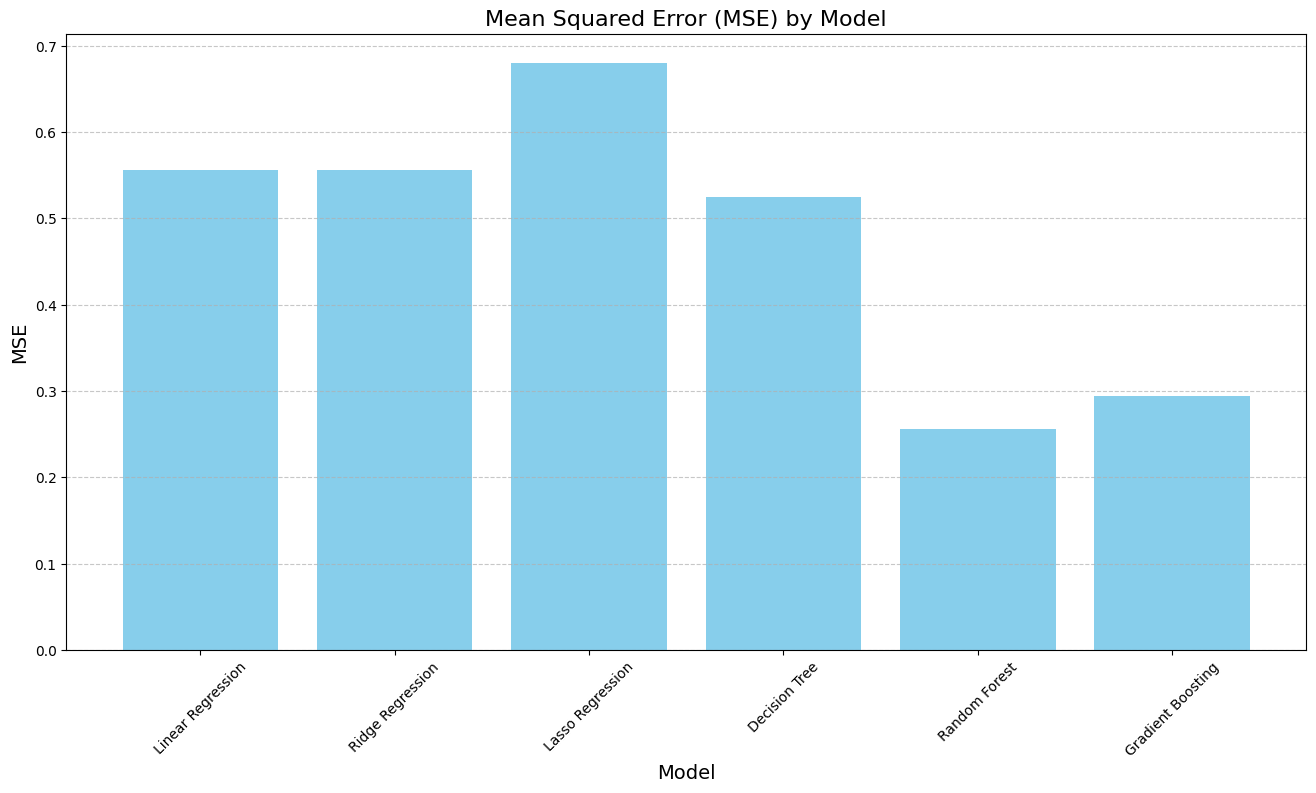

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# فرض می‌کنیم `results_df` همان جدولی است که نتایج مدل‌ها را شامل می‌شود
# ستون‌های آن: Model، MSE، MAE، R²

# 1. نمودار میله‌ای (Bar Chart)
plt.figure(figsize=(16, 8))
plt.bar(results_df["Model"], results_df["MSE"], color="skyblue")
plt.title("Mean Squared Error (MSE) by Model", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

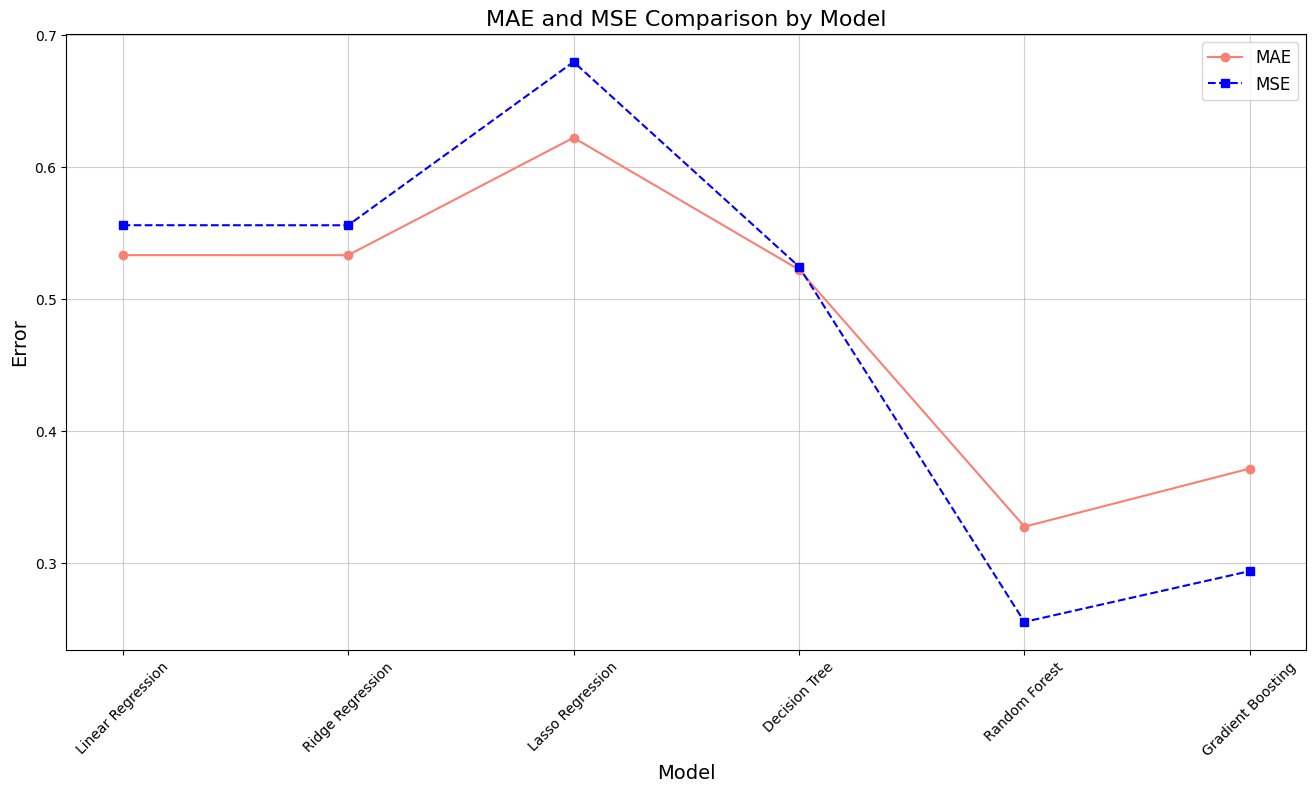

In [40]:
# 2. نمودار خطی (Line Plot)
plt.figure(figsize=(16, 8))
plt.plot(results_df["Model"], results_df["MAE"], marker='o', linestyle='-', color="salmon", label="MAE")
plt.plot(results_df["Model"], results_df["MSE"], marker='s', linestyle='--', color="blue", label="MSE")
plt.title("MAE and MSE Comparison by Model", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.6)
plt.show()

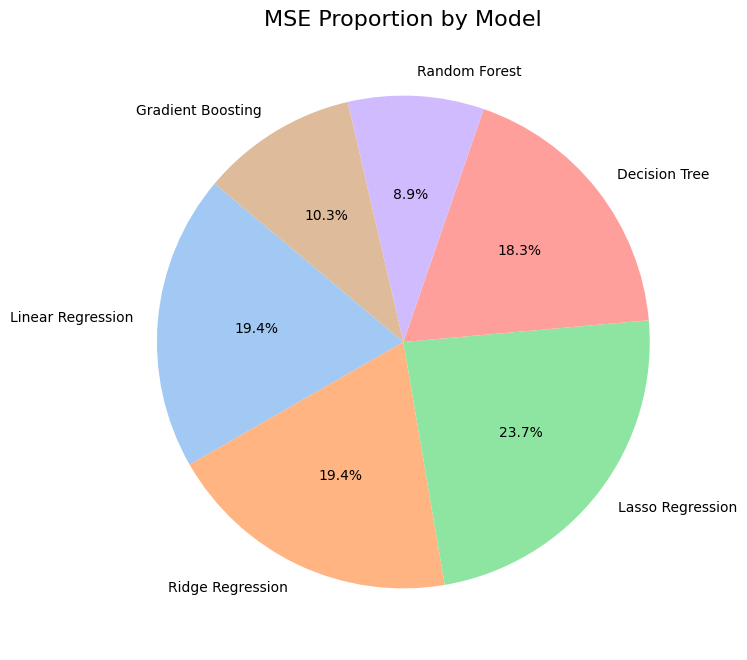

In [41]:
# 3. نمودار دایره‌ای (Pie Chart) برای نمایش نسبت اهمیت MSE
plt.figure(figsize=(8, 8))
plt.pie(results_df["MSE"], labels=results_df["Model"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("MSE Proportion by Model", fontsize=16)
plt.show()

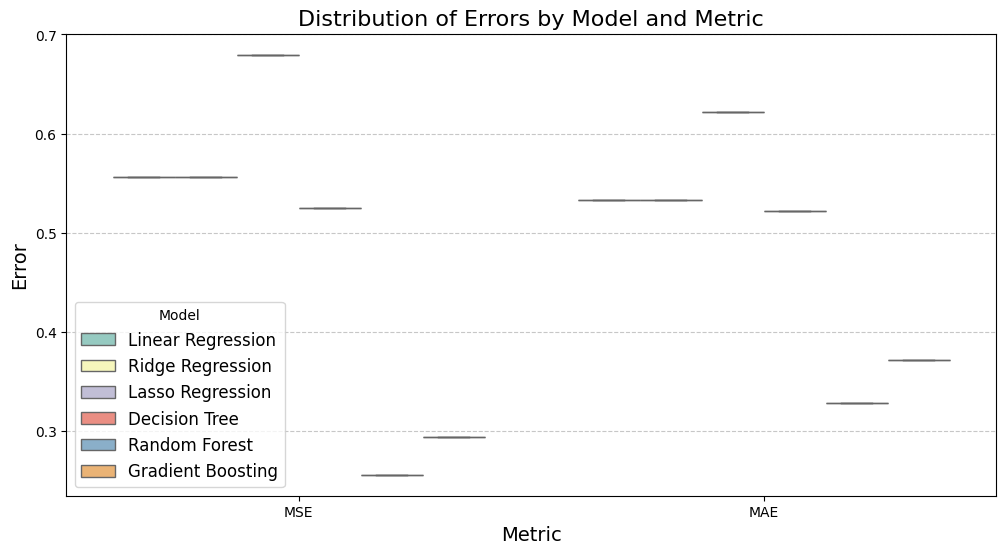

In [42]:

# 4. نمودار جعبه‌ای (Box Plot) برای بررسی توزیع خطاها (MAE و MSE)
errors = pd.melt(results_df, id_vars=["Model"], value_vars=["MSE", "MAE"], var_name="Metric", value_name="Error")
plt.figure(figsize=(12, 6))
sns.boxplot(data=errors, x="Metric", y="Error", hue="Model", palette="Set3")
plt.title("Distribution of Errors by Model and Metric", fontsize=16)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.legend(title="Model", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

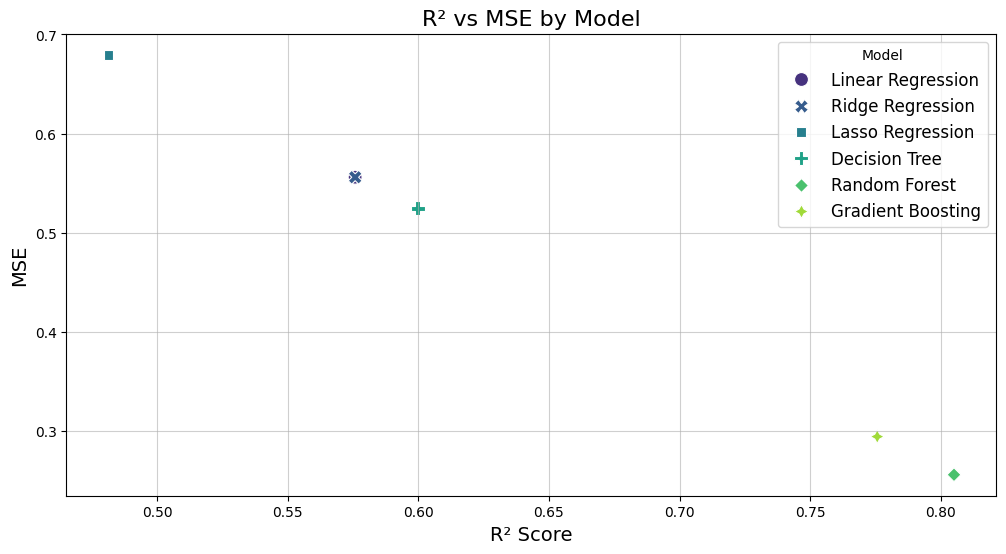

In [43]:
# 5. نمودار نقطه‌ای (Scatter Plot) برای مقایسه R² و MSE
plt.figure(figsize=(12, 6))
sns.scatterplot(data=results_df, x="R²", y="MSE", hue="Model", style="Model", s=100, palette="viridis")
plt.title("R² vs MSE by Model", fontsize=16)
plt.xlabel("R² Score", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.grid(alpha=0.6)
plt.legend(title="Model", fontsize=12)
plt.show()


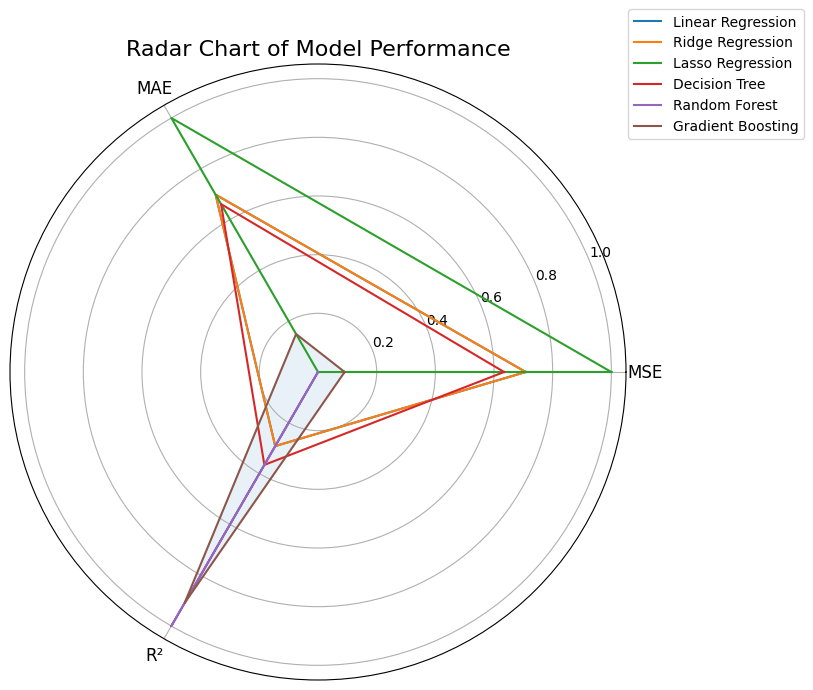

In [44]:
# 6. نمودار رادار (Radar Chart) برای نمایش مقایسه چند معیار
# برای رسم نمودار رادار، داده‌ها باید نرمال‌سازی شوند
from math import pi

# Normalizing the data between 0 and 1 for radar chart
normalized_results = results_df[["MSE", "MAE", "R²"]].copy()
for col in ["MSE", "MAE"]:
    normalized_results[col] = (normalized_results[col] - normalized_results[col].min()) / (normalized_results[col].max() - normalized_results[col].min())
normalized_results["R²"] = (normalized_results["R²"] - normalized_results["R²"].min()) / (normalized_results["R²"].max() - normalized_results["R²"].min())

# Preparing data for radar chart
categories = ["MSE", "MAE", "R²"]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the radar chart

plt.figure(figsize=(8, 8))
for i, row in normalized_results.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the radar chart
    plt.polar(angles, values, label=results_df["Model"][i])
plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories, fontsize=12)
plt.title("Radar Chart of Model Performance", fontsize=16)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=10)
plt.show()

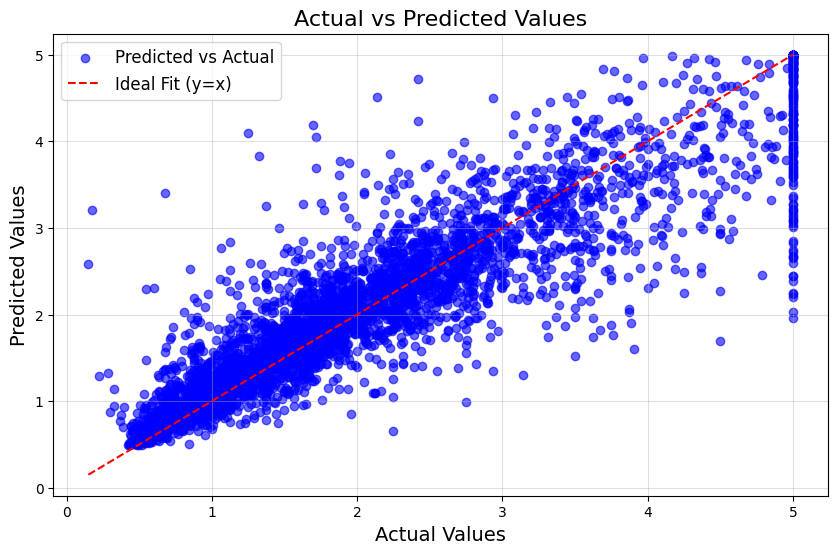

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید `best_model` بهترین مدل ذخیره شده باشد و داده‌ها تقسیم‌بندی شده‌اند:
# `X_test` ورودی‌های تست و `y_test` خروجی‌های واقعی هستند.
# پیش‌بینی مدل
y_pred = best_model.predict(X_test)

# 1. نمودار Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Fit (y=x)")
plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()

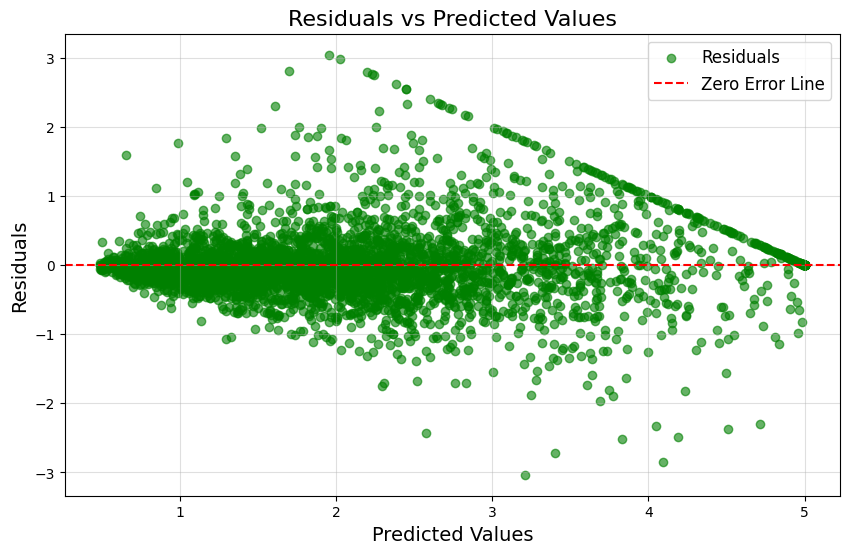

In [46]:
# 2. نمودار خطای پیش‌بینی (Residuals)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color="green", label="Residuals")
plt.axhline(y=0, color="red", linestyle="--", label="Zero Error Line")
plt.title("Residuals vs Predicted Values", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()
